In [4]:
!pip install xgboost

In [5]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configurações
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [6]:
#Carregar dataset
df = pd.read_csv("data/processed/dataset_clean.csv")
print("Shape:", df.shape)

Shape: (282, 19)


In [7]:
#variáveis preditoras e alvo
target = "casos"
features = [
    "Rt", "pop", "tempmed", "umidmed", "t_mean", "precip_sum", "pop_density",
    "casos_lag1", "casos_lag2", "casos_lag3", "casos_lag4", "casos_roll4"
]

X = df[features]
y = df[target]

In [8]:
#Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Treino:", X_train.shape, "| Teste:", X_test.shape)

Treino: (225, 12) | Teste: (57, 12)


In [9]:
#Treina modelo XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [10]:
#Avaliação do modelo
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost → MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

XGBoost → MAE: 0.0036 | RMSE: 0.0074 | R²: 0.9298


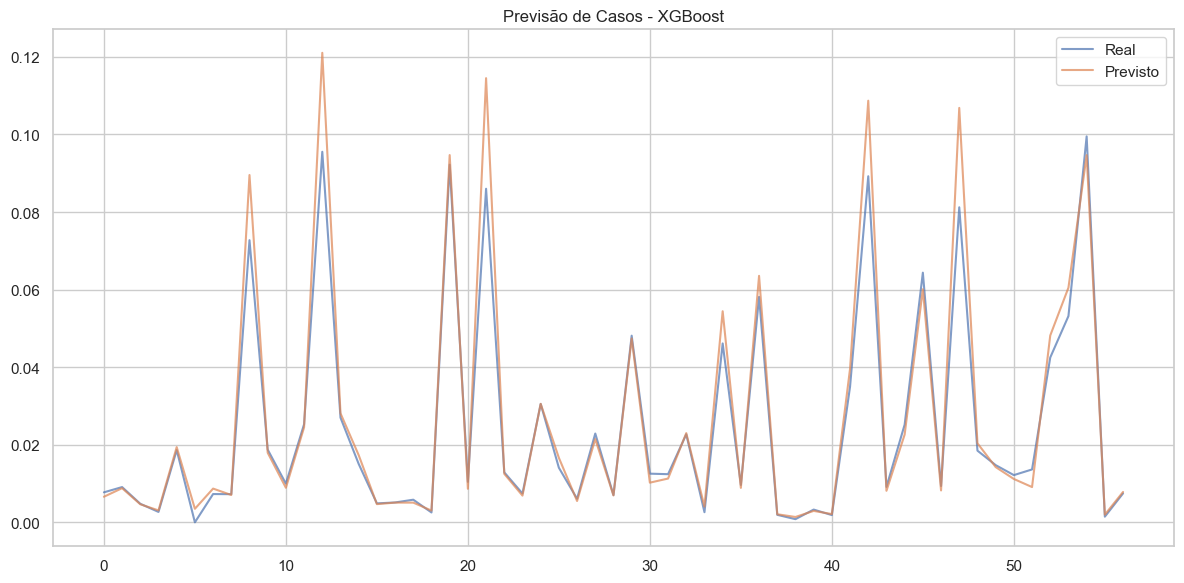

In [11]:
#Visualização das previsões
plt.plot(y_test.values, label="Real", alpha=0.7)
plt.plot(y_pred, label="Previsto", alpha=0.7)
plt.title("Previsão de Casos - XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

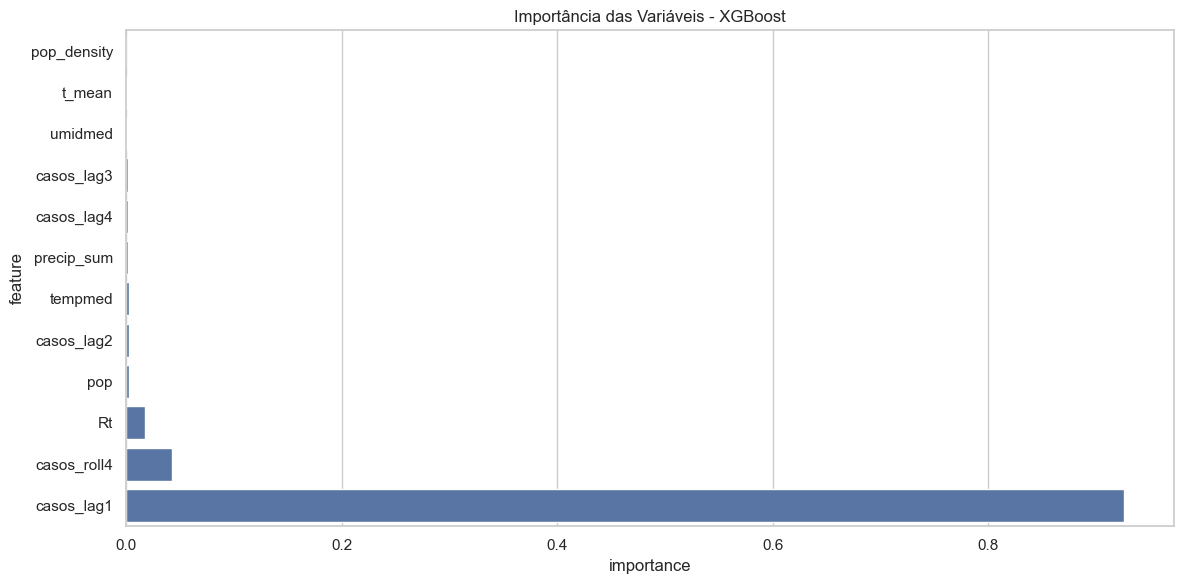

In [12]:
#Importância das variáveis
importances = model.feature_importances_
df_imp = pd.DataFrame({"feature": features, "importance": importances})
df_imp.sort_values("importance", ascending=True, inplace=True)

sns.barplot(x="importance", y="feature", data=df_imp)
plt.title("Importância das Variáveis - XGBoost")
plt.tight_layout()
plt.show()

In [13]:
#Métricas geradas
#MAE: erro absoluto médio
#RMSE: raiz do erro quadrático médio
#R²: coeficiente de determinação

#Saídas
#Gráfico de previsão real vs. previsto
#Importância das variáveis
#Avaliação quantitativa do modelo
